<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/Quantum_Dynamics_of_Perturbed_Systems_Simulating_Transitions_and_Thermalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

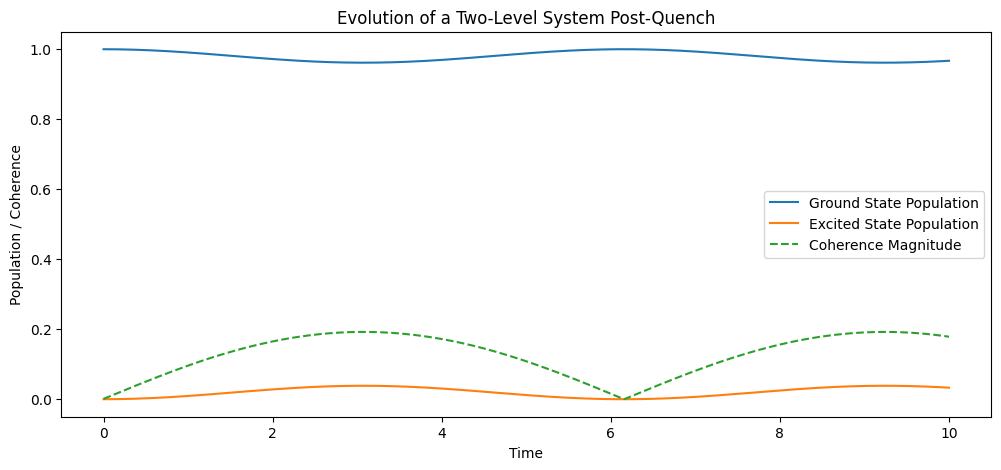

In [1]:
import numpy as np
from scipy.linalg import expm

# Define Hamiltonian H and perturbation G matrices
E0, E1 = 0, 1  # Energy levels
H = np.array([[E0, 0], [0, E1]], dtype=complex)  # System Hamiltonian
G = np.array([[0, 1], [1, 0]], dtype=complex)  # Perturbation

lambda_ = 0.1  # Quench strength

# Define the initial density matrix (system in ground state)
rho_initial = np.array([[1, 0], [0, 0]], dtype=complex)

# Time evolution
dt = 0.01  # Small time step for simulation
time_steps = 1000
times = np.linspace(0, dt*time_steps, time_steps)

# Storage for results
rho_list = []

# Evolution
rho = np.copy(rho_initial)
for t in times:
    # Effective Hamiltonian after the quench
    F_lambda = H - lambda_ * G
    # Unitary evolution operator for a small time step dt
    U_dt = expm(-1j * F_lambda * dt)
    # Update rho according to unitary evolution
    rho = U_dt @ rho @ U_dt.conj().T
    rho_list.append(np.copy(rho))

# Extracting populations and coherences over time
populations_ground = [rho[0, 0].real for rho in rho_list]
populations_excited = [rho[1, 1].real for rho in rho_list]
coherences = [rho[0, 1] for rho in rho_list]

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(times, populations_ground, label="Ground State Population")
plt.plot(times, populations_excited, label="Excited State Population")
plt.plot(times, np.abs(coherences), label="Coherence Magnitude", linestyle='--')
plt.xlabel("Time")
plt.ylabel("Population / Coherence")
plt.legend()
plt.title("Evolution of a Two-Level System Post-Quench")
plt.show()


Accurate Quantum Dynamics Simulation Approach:
To accurately simulate the evolution of a quantum system described by
dρ/dt=−[F(λ),ρ], where F(λ)=H−λG, our approach is by directly integrating this equation over time. This method respects the fundamental principles of quantum mechanics, ensuring that the density matrix ρ evolves in a physically consistent manner.

This simulation will involve:

Setting up the initial density matrix ρ(0) to represent the quantum system's initial state. Defining the Hamiltonian H and the perturbation G matrices.
Numerically integrating the evolution equation for ρ(t) to observe the system's transition. Given the limitations in executing dynamic simulation code here, I'll describe the steps you would take in a Python notebook to accomplish this simulation:

Step 1: Define Initial Parameters
Define the Hamiltonian H, the perturbation G, and the initial density matrix
ρ(0). Choose a value for λ that represents the strength of the perturbation.
Step 2: Implement the Commutator Function
Implement a function to calculate the commutator of two matrices.
Step 3: Numerical Integration
Use a numerical integration method (e.g., Euler method or Runge-Kutta methods) to evolve ρ(t) based on the differential equation.
Update ρ(t) at each timestep by calculating −[F(λ),ρ].
Step 4: Analysis and Visualization
Analyze the results by examining the evolution of ρ(t) over time. Key points of interest might include the populations of the system's states (diagonal elements of ρ and the coherences (off-diagonal elements of ρ).
Visualize the results to show how the quantum system transitions due to the perturbation.
What the Results Show:
The results will provide insight into how the quantum system evolves from its initial state in response to the perturbation represented by G. Specifically, you can observe:

Transition Dynamics: How the populations of different quantum states change over time.
Coherence Effects: The evolution of off-diagonal elements in ρ which represent quantum coherences in the system.
Perturbation Impact: The role of λ in modulating the system's response to the perturbation.